In [1]:
#Remember to sign up for API key

#Mostly for database augmentation from given data for future steps. Assuming the source isn't spurious. The plots are not important.
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = quandl.get("WIKI/AAPL.4",start_date="2016-09-01",returns="csv",collapse="monthy") # Gets closing value of AAPL stock data.Try others.

In [3]:
data.tail()

,Close
Date,
2018-03-21,171.270
2018-03-22,168.845
2018-03-23,164.940
2018-03-26,172.770
2018-03-27,168.340


In [4]:
#Scaling stuff


xvals = np.arange(0,data.shape[0])
yvals = np.array(data['Close'])

#Train set

xtrain = xvals[0:xvals.shape[0]//3]
ytrain = yvals[0:yvals.shape[0]//3]


#Test set

xtest = xvals[xvals.shape[0]//3:]
ytest = yvals[yvals.shape[0]//3:]

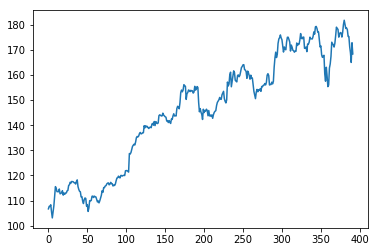

In [5]:
plt.plot(xvals,yvals)


In [6]:
#Polynomial Regression
import numpy
a=numpy.polynomial.polynomial.polyfit(xtrain,ytrain,6)

In [7]:
#Plot the fit

def plot_fit(x):
    ytest=[]
    for j in x:
        ytest.append(a[0]+a[1]*j+a[2]*(j**2)+a[3]*(j**3)+a[4]*(j**4)+a[5]*(j**5)+a[6]*(j**6))
    return ytest

In [8]:
y_fit = plot_fit(xtrain)

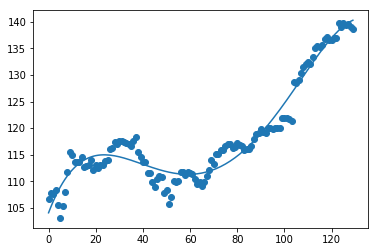

In [9]:
plt.scatter(xtrain,ytrain)
plt.plot(xtrain, y_fit)

In [10]:
#Compute RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rms_train = sqrt(mean_squared_error(ytrain, y_fit))


#Compute rmse for test set

y_fit_test = plot_fit(xtest)






In [13]:
rms_train

2.1745451737271524

In [14]:
#Linear Regression
a=numpy.polynomial.polynomial.polyfit(xvals,yvals,1)

In [15]:
#Plot the fit

def plot_fit(xtest):
    ytest=[]
    for j in xtest:
        ytest.append(a[0]+a[1]*j)
    return ytest

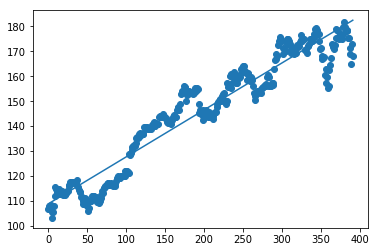

In [16]:
y_fit = plot_fit(xvals)
plt.scatter(xvals,yvals)
plt.plot(xvals, y_fit)

In [17]:
#Compute rmse

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(yvals, y_fit))

In [18]:
rms

6.454334652598487